In [309]:
%matplotlib inline
from svm_classifier import getClassifierAndVectorizer
import numpy as np
import glob, os, pickle
import math
import pickle
import collections
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [155]:
clf, vectorizer = getClassifierAndVectorizer()

imported correctly


In [207]:
def extractor(n=10):
    #n is number of opinions from each year"
    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    year = []
    cases_per_year = []
    y = 1891
    case_names = []
    a = 0
    for d in datafiles:
        sentences = sorted(glob.glob(d + "/*.txt"))
        for i, sentence in enumerate(sentences):
            if i >= n:
                break
            myfile = open(sentence,'r') 
            data=myfile.read().replace('\n', '')
            test_files.append(data)
            year.append(y)

            #adding case no and judge no.
            case_n = ""
            flag = False
            for j in sentence:
                if j == "X":
                    flag = True
                if j == "_":
                    flag = False
                if j == ".":
                    flag = False
                if flag == True:
                    case_n += j
            case_names.append(case_n)

            myfile.close()
        cases_per_year.append(len(sentences))
        y += 1
    print(a)
    return test_files, year, cases_per_year, case_names

In [228]:
#x_test = vectorizer.transform(data_to_predict)
clf, vectorizer = getClassifierAndVectorizer()
cases, year_of_case, cases_per_year, case_names = extractor()
x_test = vectorizer.transform(cases)
prediction = clf.predict(x_test)


imported correctly
0


In [208]:
cases, year_of_case, cases_per_year, case_names = extractor()

0


In [209]:
print(case_names)

['XB0OI7QNB5G0', 'XB0OIFQNB5G0', 'XB0OLBQNB5G0', 'XB0OOVQNB5G0', 'XB0P5NQNB5G0', 'XB0P8NQNB5G0', 'XB0P8NQNB5G0', 'XB0PFJQNB5G0', 'XB0PGVQNB5G0', 'XB0PHFQNB5G0', 'X9T9H7', 'XB0PONQNB5G0', 'XBBCG7QNB5G0', 'XBBCNBQNB5G0', 'XCJLRJQNB5G0', 'XCJLS3QNB5G0', 'XCJLSRQNB5G0', 'XEIVQNQNB5G0', 'XEIVS7QNB5G0', 'XFKIRQ', 'X275TR', 'X9T9IQ', 'XBBCEVQNB5G0', 'XBBCFJQNB5G0', 'XBBCFNQNB5G0', 'XBBCGBQNB5G0', 'XBBCGFQNB5G0', 'XBBCGJQNB5G0', 'XBBCGRQNB5G0', 'XBBCH3QNB5G0', 'X18JQFQNB5G0', 'X18JQFQNB5G0', 'X18JQJQNB5G0', 'X18JQRQNB5G0', 'X18JTFQNB5G0', 'X18JTNQNB5G0', 'X18JTVQNB5G0', 'X18JU3QNB5G0', 'X18JUFQNB5G0', 'X18JUNQNB5G0', 'X192FRQNB5G0', 'X192G3QNB5G0', 'X192HBQNB5G0', 'X192HNQNB5G0', 'X192HVQNB5G0', 'X192JVQNB5G0', 'X192K3QNB5G0', 'X192L3QNB5G0', 'X3D9IF', 'X3D9IF', 'X18JVFQNB5G0', 'X18JVNQNB5G0', 'X18K07QNB5G0', 'X18K07QNB5G0', 'X18K0JQNB5G0', 'X18K0RQNB5G0', 'X18K13QNB5G0', 'X18K17QNB5G0', 'X18K1BQNB5G0', 'X18K1RQNB5G0', 'X9T9OT', 'XCJM1JQNB5G0', 'XCJM1NQNB5G0', 'XEMQ2JQNB5G0', 'XEMQ73QNB5G0', '

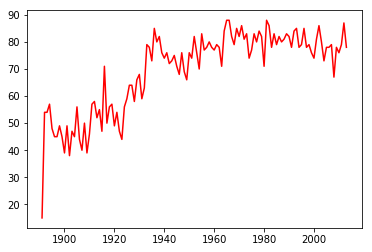

In [159]:
#for i, j in zip(attrib, prediction):
#        print('%r => %s' % (i, j))

#consPerYear = dict((yr,0) for yr in range(1891, 2014)) 
#deonPerYear = dict((yr,0) for yr in range(1891, 2014))
years = range(1891,2014)
consPerYear, deonPerYear = np.zeros(len(years)), np.zeros(len(years))
for i, j in zip(year_of_case, prediction):
    if j == "cons":
        consPerYear[i - 1891] += 1
    if j == "deon":
        deonPerYear[i - 1891] += 1
        
        
plt.plot(years, consPerYear, 'r')
#plt.plot(years, deonPerYear)
#plt.show()

Text(0,0.5,'Percentage of Cases with Cons Reasoning')

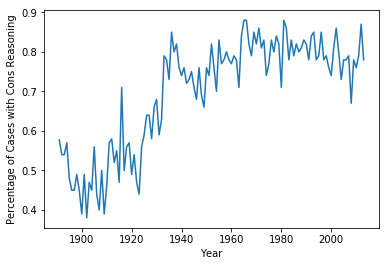

In [161]:
percentages = [] #consPerYear / cases_per_year
for i, j in zip(consPerYear, cases_per_year):
    if j < 100:
        percentages.append(i/float(j))
    else:
        percentages.append(i/100)
plt.plot(years, percentages)
plt.xlabel("Year")
plt.ylabel("Percentage of Cases with Cons Reasoning")

In [162]:
def MajVsDisExtractor():

    filename = "sentences_new/"
    datafiles = sorted(glob.glob(filename + "sent_????"))
    test_files = []
    maj_op = []
    dis_op = []

    d = datafiles[1922-1891]
    sentences = sorted(glob.glob(d + "/*.txt"))

    for i in range(len(sentences)):
        myfile = open(sentences[i],'r')
        data=myfile.read().replace('\n', '')
        if "MajOp" in sentences[i]:
            maj_op.append(data)
        elif "DisOp" in sentences[i]:
            dis_op.append(data)
    
        myfile.close()
    return maj_op, dis_op

In [163]:
majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

majOp, disOp = MajVsDisExtractor()
majTest = vectorizer.transform(majOp)
predictionMaj = clf.predict(majTest)
disTest = vectorizer.transform(disOp)
predictionDis = clf.predict(disTest)

0.48475909537856443
0.6666666666666666


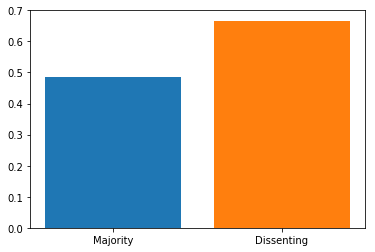

In [164]:
percentMajCons = predictionMaj.tolist().count('cons') / len(majOp)
percentDisCons = predictionDis.tolist().count('cons') / len(disOp)
plt.bar("Majority", percentMajCons)
plt.bar("Dissenting", percentDisCons)
print(percentMajCons)
print(percentDisCons)
#1922

In [ ]:
#plots we want to make


#percentage of cons reasoning before and after econ seminar
#judge reasoning over time (do judges stay persistently deon/cons?)
#deon/cons vs educational instiution
#deon/cons vs location?
#deon/cons for topics (how do we identify topics)

In [2]:
def loadDataset(pklPath):
    with open(pklPath, "rb") as pklFile:
        return np.array(pickle.load(pklFile, encoding="utf-8"))

In [114]:
genis = loadDataset("/Users/liammeier/moral-reasoning/bb2genis.pkl")
md = pd.read_stata("/Users/liammeier/moral-reasoning/circuit_metadata_excerpt.dta") #md for metadata

In [119]:
#print(metadata['songername'])
#print(df.keys())
#print(type(df))
print(md)

            Circuit  j       date                  songername  Affirmed  \
caseid                                                                    
X101L14003        4  2 2004-03-24         DUNCAN, ALLYSON KAY       0.0   
X101L14003        4  3 2004-03-24          KING, ROBERT BRUCE       0.0   
X101L14003        4  1 2004-03-24         MOTZ, DIANA GRIBBON       0.0   
X10284I003        4  3 2004-03-31          LUTTIG, J. MICHAEL       0.0   
X10284I003        4  1 2004-03-31   WILKINSON, J. HARVIE, III       0.0   
X10284I003        4  2 2004-03-31  TRAXLER, WILLIAM BYRD, JR.       0.0   
X102UPO003        3  3 2004-04-05        RENDELL, MARJORIE O.       0.0   
X102UPO003        3  1 2004-04-05        SLOVITER, DOLORES K.       0.0   
X102UPO003        3  2 2004-04-05           ALDISERT, RUGGERO       0.0   
X103660N          9  1 1994-07-25        HUG, PROCTER R., JR.       1.0   
X103660N          9  3 1994-07-25      SCHROEDER, MARY MURPHY       1.0   
X103660N          9  2 19

In [115]:
md.keys()
md = md.set_index('caseid')


In [219]:
c = md.loc['XB0OIFQNB5G0']
print(c)
a = md.loc['XB0OIFQNB5G0']['Author'].iloc[0]
print(a)
s = c['songername']
for i, name in enumerate(s):
    if a in name:
        correctName = name

print(correctName)

              Circuit  j date             songername  Affirmed  \
caseid                                                           
XB0OIFQNB5G0        8  2  NaT                              1.0   
XB0OIFQNB5G0        8  3  NaT  NELSON, SUSAN RICHARD       1.0   
XB0OIFQNB5G0        8  1  NaT                              1.0   

              AffirmedInPart  Reversed  ReversedInPart  Vacated  \
caseid                                                            
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   
XB0OIFQNB5G0             0.0       0.0             0.0      0.0   

              VacatedInPart  Remanded  Dissenting1 Author  Writer  
caseid                                                             
XB0OIFQNB5G0            0.0       0.0          0.0            NaN  
XB0OIFQNB5G0            0.0       0.0          0.0            NaN  
XB0OIFQNB5G0            0.0       0.0          0.0           

In [143]:
a.iloc[0]

'MURPHY'

In [222]:
case_songername = []
bad_cases = []
for case in case_names:
    try:
        c =  md.loc[case]
        author = c['Author'].iloc[0]
        songername = c['songername']
        for i, name in enumerate(songername):   
            if author in name:
                correctName = name
            #if author == '' and name != '':
            #    correctName = name
        case_songername.append(correctName)
    except:
        case_songername.append(-1)
        bad_cases.append(case)


In [229]:
#print(case_names)
print(len(case_songername))
print(len(prediction))

1230
1230


In [231]:
bios = pd.read_stata("/Users/liammeier/moral-reasoning/JudgesBioReshaped_TOUSE.dta")

In [232]:
bios = bios.set_index('songername')

In [252]:
attributes = ['birthyear']
#print(case_songername[0])
j = bios.loc[case_songername[0]]
print(j.loc['birthyear'])

def makeAtrList(atr):
    listToReturn = []
    for name in case_songername:
        try:
            judge = bios.loc[name]
            listToReturn.append(judge.loc[atr])
        except:
            listToReturn.append(-1)
    return listToReturn

1952.0


In [273]:
attributes = ['birthyear', 'presidentname', 'genderNew', 'nameofschool2',
              'raceorethnicity', 'partyaffiliationofpresident', 'placeofbirthstate']
atr = dict()    
for a in attributes:
    atr[a] = makeAtrList(a)

In [288]:
#print(atr)
#for key, value in atr.items():
#    print(len(value))

Text(0.5,0,'Party of Appointing President')

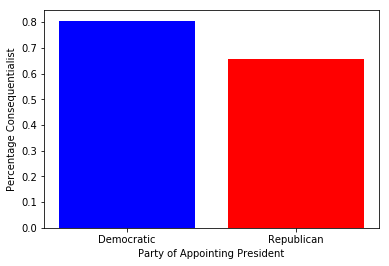

In [287]:
#Appointing President Party Affiliation
partyList = atr['partyaffiliationofpresident']
repCons = 0
demCons = 0
numRep = 0
numDem = 0
for i, j in zip(partyList, prediction):
    if i == "Democratic":
        numDem += 1
        if j == "cons":
            demCons +=1
    elif i == "Republican":
        numRep += 1
        if j == "cons":
            repCons +=1

plt.bar("Democratic", (demCons/numDem), color='b',)
plt.bar("Republican", (repCons/numRep), color='r')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Party of Appointing President")

Text(0.5,0,'Gender of Judge')

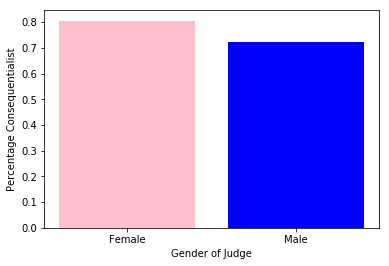

In [295]:
#By Gender
genderList = atr['genderNew']
femCons = 0
malCons = 0
numFem = 0
numMal = 0
for i, j in zip(genderList, prediction):
    if i == "M":
        numMal += 1
        if j == "cons":
            malCons +=1
    elif i == "F":
        numFem += 1
        if j == "cons":
            femCons +=1

plt.bar("Female", (femCons/numFem), color='pink',)
plt.bar("Male", (malCons/numMal), color='b')
plt.ylabel("Percentage Consequentialist")
plt.xlabel("Gender of Judge")

In [331]:
school = atr['nameofschool2']
schoolSet = set(school)
schoolCons = dict()
schoolTotal = dict()

for s in schoolSet:
    schoolTotal[s] = school.count(s)
   
for i, j in zip(school, prediction):
    schoolCons[i] = 0
    
for i, j in zip(school, prediction):
    if j == 'cons':
        schoolCons[i] += 1

percentDict = dict()
#come back and add n = ...
for i in schoolTotal.keys():
    if schoolTotal[i] > 5:
        percentDict[i] = schoolCons[i]/schoolTotal[i]

#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_percentDict = sorted(percentDict.items(), key=operator.itemgetter(1))
for i in sorted_percentDict:
    print(i)

#print(sorted_percentDict)
        
#print(schoolTotal)
#print(schoolCons)
"""
plt.figure(figsize=(20,10))
for i in schoolTotal.keys():
    if schoolTotal[i] > 10:
        plt.bar(i, schoolCons[i]/schoolTotal[i])
"""

('Stanford Law School', 0.25)
('College of New Jersey (now Princeton University)', 0.5)
('University of Michigan Law School', 0.5384615384615384)
('Cumberland School of Law', 0.5714285714285714)
('University of Washington School of Law', 0.6)
('', 0.6761904761904762)
(-1, 0.7140151515151515)
('University of Pittsburgh School of Law', 0.7142857142857143)
('University of Pennsylvania Law School', 0.7142857142857143)
('Read law', 0.7333333333333333)
('Columbia Law School', 0.75)
('Yale Law School', 0.7555555555555555)
('Harvard Law School', 0.7985074626865671)
('University of North Carolina School of Law', 0.8)
('Boston University School of Law', 0.8)
('University of Wisconsin Law School', 0.8333333333333334)
('University of Virginia School of Law', 0.8421052631578947)
('University of Chicago Law School', 0.9230769230769231)
('University of Minnesota Law School', 1.0)
('University of Texas School of Law', 1.0)
('Columbia University', 1.0)


'\nplt.figure(figsize=(20,10))\nfor i in schoolTotal.keys():\n    if schoolTotal[i] > 10:\n        plt.bar(i, schoolCons[i]/schoolTotal[i])\n'

In [272]:
a = bios.loc['ADAMS, HENRY LEE']
print(a)
#for i, j in zip(a.keys(), a):
#    print(i, "-->" , j)

judgeidentificationnumber                                                    12
Term                                                                          1
id                                                                        23230
AppointmentDate                                             1993-11-24 00:00:00
TerminationDate                                                             NaT
courtname                      u. s. district court, middle district of florida
courttype                                                                  usdc
abarating                                                             Qualified
AbaUpdate                                                                      
SenateConfirmationdate                                      1993-11-20 00:00:00
RecessAppointDate                                                           NaT
birthday                                                                    NaN
birthmonth                              

In [ ]:
#birthyear, nameofschool1, degree_law, raceorethnicity, placeofbirthstate, partyaffiliationofrenompres, genderNew, party
# political_party,


#